Reem Emad, Sec.: 1, B.N.: 33

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import mode
import matplotlib.pyplot as plt

In [3]:
# load the dataset using pandas
df = pd.read_excel("Concrete_Data.xlsx")

In [4]:
# split the dataframe into a training and testing splits with a 70% / 30% ratio
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42) # Random is fixed for reproducability

In [ ]:
df_train

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
196,194.68,0.0,100.52,165.62,7.48,1006.4,905.90,28,25.724350
631,325.00,0.0,0.00,184.00,0.00,1063.0,783.00,7,17.540269
81,318.80,212.5,0.00,155.70,14.30,852.1,880.40,3,25.200348
526,359.00,19.0,141.00,154.00,10.91,942.0,801.00,3,23.639177
830,162.00,190.0,148.00,179.00,19.00,838.0,741.00,28,33.756745
...,...,...,...,...,...,...,...,...,...
87,286.30,200.9,0.00,144.70,11.20,1004.6,803.70,3,24.400556
330,246.83,0.0,125.08,143.30,11.99,1086.8,800.89,14,42.216615
466,190.34,0.0,125.18,166.61,9.88,1079.0,798.90,100,33.563692
121,475.00,118.8,0.00,181.10,8.90,852.1,781.50,28,68.299493


In [ ]:
df_train.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,284.409681,74.971886,52.006588,181.805576,6.125337,973.798128,771.636297,46.049931,36.152573
std,108.361334,87.717335,63.707358,21.159956,6.046367,78.509208,80.125492,61.650743,16.803402
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.000000,0.000000,0.000000,165.620000,0.000000,932.000000,724.300000,14.000000,23.890343
50%,277.000000,22.000000,0.000000,185.700000,6.000000,968.000000,778.450000,28.000000,35.076402
75%,362.600000,145.000000,117.540000,192.000000,10.100000,1040.000000,821.000000,56.000000,46.247292
max,540.000000,359.400000,195.000000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [5]:
# extract the models input and targets from both the training and testing dataframes
def extract_Xy(df):
    df_numpy = df.to_numpy()
    return df_numpy[:, :-1], df_numpy[:, -1]

X_train, y_train = extract_Xy(df_train)
X_test, y_test = extract_Xy(df_test)

y_median = np.median(y_train)
print("Median value of the target:", y_median)

# Since we will treat this as a classification task, we will assume that
# the concrete is "strong" (y = True) if its compressive ratio is higher than the median
# otherwise, it is assumed to be "weak" (y = False)
y_train = y_train > y_median
y_test = y_test > y_median

# Now ~50% of the samples should be considered "strong" and the rest are considered "weak"
print(f"Percentage of 'strong' samples: {y_train.mean() * 100} %")

# Also, lets standardize the data since it improves the training process
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train = (X_train - X_mean)/(1e-8 + X_std)
X_test = (X_test - X_mean)/(1e-8 + X_std)

Median value of the target: 35.076402024
Percentage of 'strong' samples: 49.930651872399444 %


## Bagging from Scratch

In [6]:
class GenericBagging:

    def __init__(self, n_estimators):
        self.n_estimators = n_estimators
        self.estimators = []
        self.initialize_estimators()
        
    def initialize_estimators(self):
        # initialize the given number of estimators
        for _ in range(self.n_estimators):  # Fix typo, use range() instead of the number itself
            # Don't change the decision tree parameters
            self.estimators.append(DecisionTreeClassifier(max_depth=5, random_state=0))

    def generate_data_subset(self, X, Y):
        # Generate bootstrap samples (with replacement)
        # Use a subset size of 300 samples 
        indices = np.random.choice(X.shape[0], size=300, replace=True)
        X_subset = X[indices]
        Y_subset = Y[indices]
        return X_subset, Y_subset
        
    def fit(self, X, Y):
        # loop over each classifier and fit on random data subset
        for estimator in self.estimators:
            X_subset, Y_subset = self.generate_data_subset(X, Y)
            estimator.fit(X_subset, Y_subset)

    def predict(self, X):
        # implement prediction function using majority vote
        predictions = np.zeros((X.shape[0], len(self.estimators)))
        for i, estimator in enumerate(self.estimators):
            predictions[:, i] = estimator.predict(X)
        majority_vote = mode(predictions, axis=1)[0]
        return majority_vote.flatten()

    def calculate_oob_error(self, X, Y):
        # calculate Out-of-Bag error
        # The out-of-bag (OOB) error is the average error for each training observation
        # calculated using predictions from the trees that do not contain this training observation
        # in their respective bootstrap sample. 
        oob_errors = []
        for i, estimator in enumerate(self.estimators):
            indices = np.arange(X.shape[0])
            mask = np.zeros(X.shape[0], dtype=bool)
            mask[self.generate_data_subset(X, Y)[0].astype(int)] = True
            indices_oob = indices[~mask]
            if len(indices_oob) > 0:
                X_oob = X[indices_oob]
                Y_oob = Y[indices_oob]
                oob_prediction = estimator.predict(X_oob)
                oob_error = 1 - np.mean(oob_prediction == Y_oob)
                oob_errors.append(oob_error)
        return np.mean(oob_errors)

In [7]:
def get_scores(n_estimators):
    # run model bagging and compute OOB error and test accuracy
    model = GenericBagging(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    y_test_predict = model.predict(X_test)
    return model.calculate_oob_error(X_train, y_train), accuracy_score(y_test, y_test_predict)

In [18]:
def run_bagging():
    n_estimators_options = [5, 10, 50, 100, 200, 500]
    oob_errors = []
    test_accuracies = []
    for n_estimators in n_estimators_options:
        oob_error, test_accuracy = get_scores(n_estimators)
        oob_errors.append(oob_error)
        test_accuracies.append(test_accuracy)
    # TODO: plot the output scores against n_estimators
    plt.plot(n_estimators_options, oob_errors, label="OOB Error")
    plt.plot(n_estimators_options, test_accuracies, label="Test Accuracy")
    plt.xlabel("Number of estimators")
    plt.ylabel("Score")
    plt.legend()
    plt.show()
    plt.plot(n_estimators_options, oob_errors, label="OOB Error")
    plt.xlabel("Number of estimators")
    plt.ylabel("Score")
    plt.legend()
    plt.show()
    plt.plot(n_estimators_options, test_accuracies, label="Test Accuracy")
    plt.xlabel("Number of estimators")
    plt.ylabel("Score")
    plt.legend()
    plt.show()

<ipython-input-6-c9f55a96624a>:33: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority_vote = mode(predictions, axis=1)[0]
<ipython-input-6-c9f55a96624a>:33: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority_vote = mode(predictions, axis=1)[0]
<ipython-inp

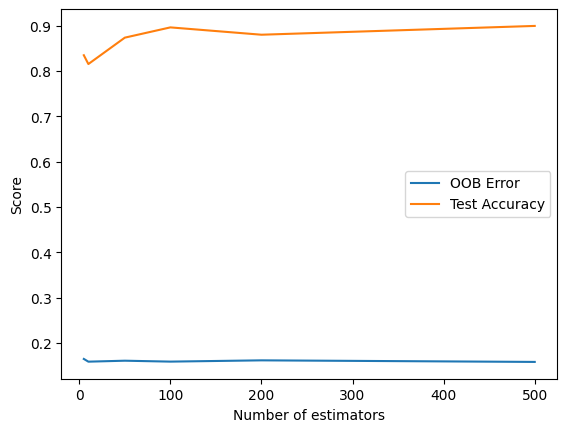

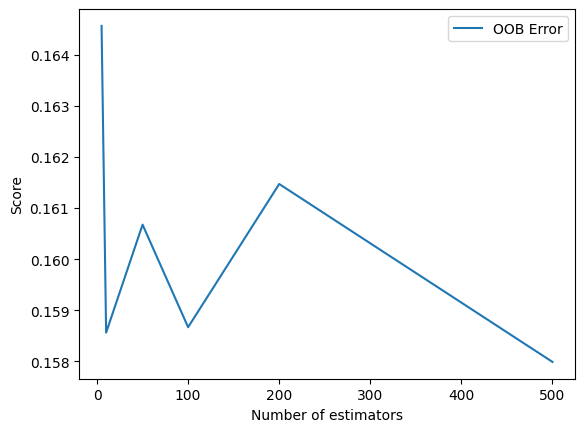

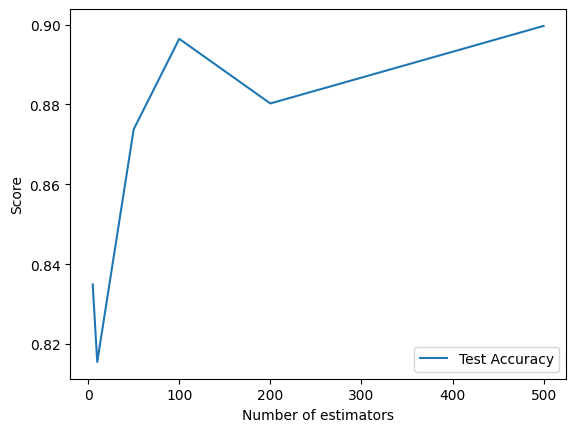

In [24]:
run_bagging()

The test accuaracy increases while the out-of-bag error decreases as the number of estimators increase(espicailly when the number of estimators is more than 200).

Each estimator in bagging is trained on a different bootstrap sample(different features or different points). So, the estimators are independent then as the number of estimators increase, the varience of the model decreases. Therefore, the OOB(overall) error decreases and consequently the test error deacreases (accuaracy increases).

The constant values of OOB error and Test Accuaracy as the number of estimators increase is due to the fact that adding estimators is redundant.

## AdaBoost from Scratch

In [ ]:
class GenericBoosting:

    def __init__(self, n_estimators):
        self.n_estimators = n_estimators

    def create_estimator(self):
        # create a decision stump as a weak estimator
        return DecisionTreeClassifier(max_depth=1, random_state=0)

    def fit_and_predict(self, X_train, Y_train, X_test, Y_test):

        # map values in Y_train and Y_test to 1 and -1
        Y_train = Y_train.astype(int)
        Y_train = np.where(Y_train == 0, -1, 1)
        Y_test = Y_test.astype(int)
        Y_test = np.where(Y_test == 0, -1, 1)

        # apply AdaBoost on weak estimators
        
        ## initialize the training and test data with empty array placeholders
        pred_train = np.empty((self.n_estimators, X_train.shape[0]))
        pred_test = np.empty((self.n_estimators, X_test.shape[0]))
        
        # initialize weights
        W = np.ones((X_train.shape[0],)) / X_train.shape[0]

        # loop over the boosting iterations 
        for idx in range(self.n_estimators): 

            # create and fit a new decision stump
            model = self.create_estimator().fit(X_train, Y_train, sample_weight=W)

            # predict classes for the training data and test data
            pred_train_idx = model.predict(X_train)
            pred_test_idx = model.predict(X_test)

            # TODO: calculate the miss Indicator
            miss_indicator = pred_train_idx != Y_train

            # calculate the error for the current classifier
            cls_err = np.sum(W * miss_indicator) / np.sum(W)

            # TODO: calculate current classifier weight
            cls_alpha = 0.5 * np.log((1 - cls_err) / cls_err)

            # TODO: update the weights 
            W = W * np.exp(-cls_alpha * Y_train * pred_train_idx)

            # TODO: add to the overall predictions
            pred_train[idx] = cls_alpha * pred_train_idx
            pred_test[idx] = cls_alpha * pred_test_idx

            # normalize weights 
            W = W / np.sum(W)

        # TODO: return accuracy on train and test sets

        train_accuracy = accuracy_score(Y_train, np.sign(np.sum(pred_train, axis=0)))
        test_accuracy = accuracy_score(Y_test, np.sign(np.sum(pred_test, axis=0)))
        
        return train_accuracy, test_accuracy

In [ ]:
def get_scores(n_estimators):
    # run model boosting and compute train and test accuracy
    model = GenericBoosting(n_estimators=n_estimators)
    train_accuracy, test_accuracy = model.fit_and_predict(X_train, y_train, X_test, y_test)
    return train_accuracy, test_accuracy

In [ ]:
def run_boosting():
    n_estimators_options = [5, 10, 50, 100, 200, 500]
    train_accuracies = []
    test_accuracies = []
    for n_estimators in n_estimators_options:
        train_accuracy, test_accuracy = get_scores(n_estimators)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    # TODO: plot the output scores against n_estimators
    plt.plot(n_estimators_options, train_accuracies, label="Train Accuracy")
    plt.plot(n_estimators_options, test_accuracies, label="Test Accuracy")
    plt.xlabel("Number of estimators")
    plt.ylabel("Score")
    plt.legend()
    plt.show()

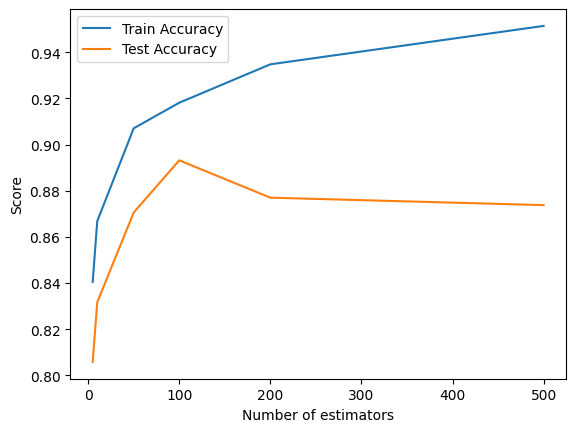

In [ ]:
run_boosting()

Can see that it's curse dimensionality at number of estimators = 100

At number of estimators > 100 (very large ensemble size) : the train accuaracy is geفting higher while the test accuaracy is getting lower, it's where the overfitting occurs

At number of estimators < 100 : it's going normally, where increasing number of estimators, increases the accuaracy in both train and test

by increasing number of estimators, more iterations on the training data are done leading to less missclassification on the training data, so the train accuaracy increases with bad generalization on the test data, so the test accuaracy decreases